### 1) Instalación y verificación del entorno

**Qué hacemos:** Instalamos la librería `ultralytics` (YOLOv8) y dependencias básicas.  
**Por qué:** Es la forma más simple y mantenida para usar YOLO en Colab (detección/segmentación).  
**Qué esperamos:** Que `ultralytics` quede instalado y podamos cargar un modelo sin errores.


In [9]:
!pip -q install ultralytics opencv-python matplotlib

import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import os
import random

# Reproducibilidad
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

print("Torch:", torch.__version__)
print("CUDA disponible:", torch.cuda.is_available())


Torch: 2.9.0+cpu
CUDA disponible: False


### 2) Subida de imagen

**Qué hacemos:** Permitimos subir una imagen desde tu PC al runtime de Colab.  
**Por qué:** Necesitamos un archivo de entrada para ejecutar la detección/segmentación.  
**Qué esperamos:** Obtener la ruta local del archivo subido y visualizarlo para validar.


Saving HojasDeTomate.jpg to HojasDeTomate.jpg
Imagen cargada: HojasDeTomate.jpg


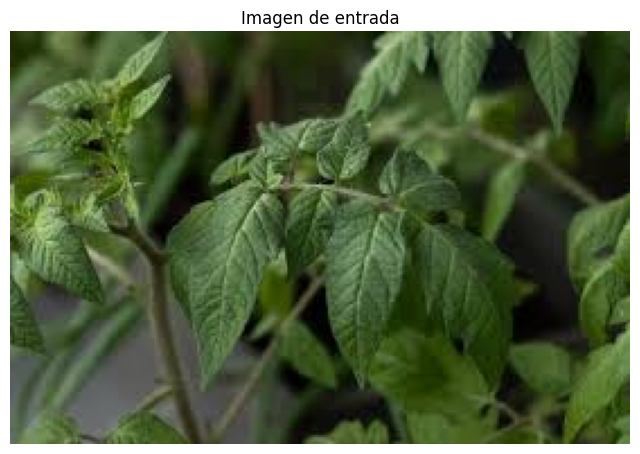

In [ ]:
uploaded = files.upload()

# Tomamos el primer archivo subido
img_path = next(iter(uploaded.keys()))
print("Imagen cargada:", img_path)

# Mostrar imagen
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Imagen de entrada")
plt.show()


### 3A) Inferencia con YOLO preentrenado

**Qué hacemos:** Cargamos un modelo YOLO preentrenado (`yolo11x_leaf.pt`) y lo ejecutamos.  
**Por qué:** Sirve para comprobar que todo funciona end-to-end.  
**Qué esperamos:** Detecciones de objetos comunes
**Limitación:** Normalmente NO existe la clase “hoja”, así que no esperes detecciones de hojas sin entrenar un modelo específico.


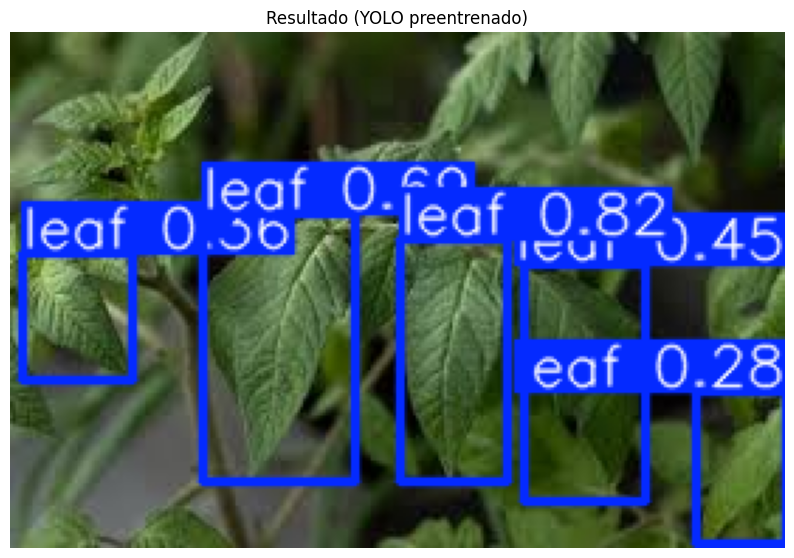

Clase: leaf            conf=0.82 bbox=[138  73 176 159]
Clase: leaf            conf=0.69 bbox=[ 68  64 122 159]
Clase: leaf            conf=0.45 bbox=[182  82 225 166]
Clase: leaf            conf=0.36 bbox=[  4  78  43 123]
Clase: leaf            conf=0.28 bbox=[243 127 275 181]


In [ ]:
# Modelo pequeño para demo (rápido)
model = YOLO("/content/yolo11x_leaf.pt")

results = model.predict(
    source=img_path,
    conf=0.25,
    iou=0.5,
    imgsz=640,
    verbose=False
)

# Render (devuelve imagen con bounding boxes)
annotated_bgr = results[0].plot()
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.title("Resultado (YOLO preentrenado)")
plt.show()

# (Opcional) listar detecciones en texto
boxes = results[0].boxes
names = results[0].names
if boxes is not None and len(boxes) > 0:
    for b in boxes:
        cls_id = int(b.cls[0])
        conf = float(b.conf[0])
        xyxy = b.xyxy[0].cpu().numpy().astype(int)
        print(f"Clase: {names[cls_id]:<15} conf={conf:.2f} bbox={xyxy}")
else:
    print("No se detectaron objetos con este modelo.")


### 4) Conteo de hojas y exportación

**Qué hacemos:** Contamos cuántas detecciones devuelve YOLO y guardamos la imagen anotada.  
**Por qué:** Un caso típico es cuantificar hojas (conteo) y guardar evidencia del resultado.  
**Qué esperamos:** Un número de hojas detectadas y un archivo de salida descargable.


In [ ]:
# Usamos el último resultado (leaf_results si existe; si no, results)
res = leaf_results[0] if "leaf_results" in globals() else results[0]

num_detections = 0 if res.boxes is None else len(res.boxes)
print("Número de detecciones:", num_detections)

out_path = "resultado_yolo.png"
annotated = res.plot()
cv2.imwrite(out_path, annotated)
print("Guardado:", out_path)

· files.download(out_path)


Número de detecciones: 5
Guardado: resultado_yolo.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>